In [1]:
import pandas as pd
import talib
import yfinance as yf





In [2]:
# Load stock price data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\GOOG_historical_data.csv') 
# Convert 'Date' to datetime format and set it as the index
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert relevant columns to numeric and fill null values
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count null values
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Remove rows with any null values
df_cleaned = df.dropna()

# Display shape before and after cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you need to continue with calculations
df_cleaned['SMA'] = talib.SMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['RSI'] = talib.RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['MACD'], df_cleaned['MACD_Signal'], df_cleaned['MACD_Hist'] = talib.MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Final DataFrame structure
print("Final cleaned DataFrame structure:")
print(df_cleaned.info())
print(df.dtypes)

Null values in each column:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Original DataFrame shape: (5020, 8)
Cleaned DataFrame shape: (5020, 8)
Final cleaned DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2004-08-19 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5020 non-null   float64
 1   High          5020 non-null   float64
 2   Low           5020 non-null   float64
 3   Close         5020 non-null   float64
 4   Adj Close     5020 non-null   float64
 5   Volume        5020 non-null   int64  
 6   Dividends     5020 non-null   float64
 7   Stock Splits  5020 non-null   float64
 8   SMA           5007 non-null   float64
 9   RSI           5006 non-null   float64
 10  MACD          4987 non-null   float64
 11  MACD_Signal   4987 n

In [3]:
null_counts = df.isnull().sum()

In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [4]:

# If 'Date' is found, convert it to datetime and set as index
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\GOOG_historical_data.csv') 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print("Date column converted and set as index.")
    df=[print(df.head)]
   
else:
    print("No 'Date' column found. Please check the CSV structure.")
    
               

Date column converted and set as index.
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.490664    2.591785    2.390042    2.499133    2.496292   
2004-08-20    2.515820    2.716817    2.503118    2.697639    2.694573   
2004-08-23    2.758411    2.826406    2.716070    2.724787    2.721690   
2004-08-24    2.770615    2.779581    2.579581    2.611960    2.608991   
2004-08-25    2.614201    2.689918    2.587302    2.640104    2.637103   
...                ...         ...         ...         ...         ...   
2024-07-24  175.389999  177.949997  173.570007  174.369995  174.369995   
2024-07-25  174.250000  175.199997  169.050003  169.160004  169.160004   
2024-07-26  168.770004  169.839996  165.865005  168.679993  168.679993   
2024-07-29  170.500000  172.160004  169.720001  171.130005  171.130005   
2024-07-30  171.830002  172.949997  170.11

In [12]:
import pandas as pd
import talib
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\GOOG_historical_data.csv') 
# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days
# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12,slowperiod=26,signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()
# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])                                  

           Close         SMA        RSI      MACD  MACD_Signal  MACD_Hist
200     7.246339    4.493303  63.188127  0.467185     0.392373   0.074812
201     7.300635    4.516318  63.299400  0.479975     0.409893   0.070082
202     6.962901    4.537509  62.125428  0.457585     0.419432   0.038153
203     7.131021    4.560104  62.473618  0.448239     0.425193   0.023046
204     7.036127    4.582084  62.149500  0.428239     0.425802   0.002436
...          ...         ...        ...       ...          ...        ...
5015  174.369995  153.415300  54.312391 -0.034166     1.571016  -1.605182
5016  169.160004  153.567450  53.551292 -1.106693     1.035474  -2.142167
5017  168.679993  153.713350  53.481895 -1.972672     0.433845  -2.406517
5018  171.130005  153.873000  53.789086 -2.433223    -0.139569  -2.293654
5019  171.860001  154.023800  53.880288 -2.708091    -0.653273  -2.054818

[4820 rows x 6 columns]


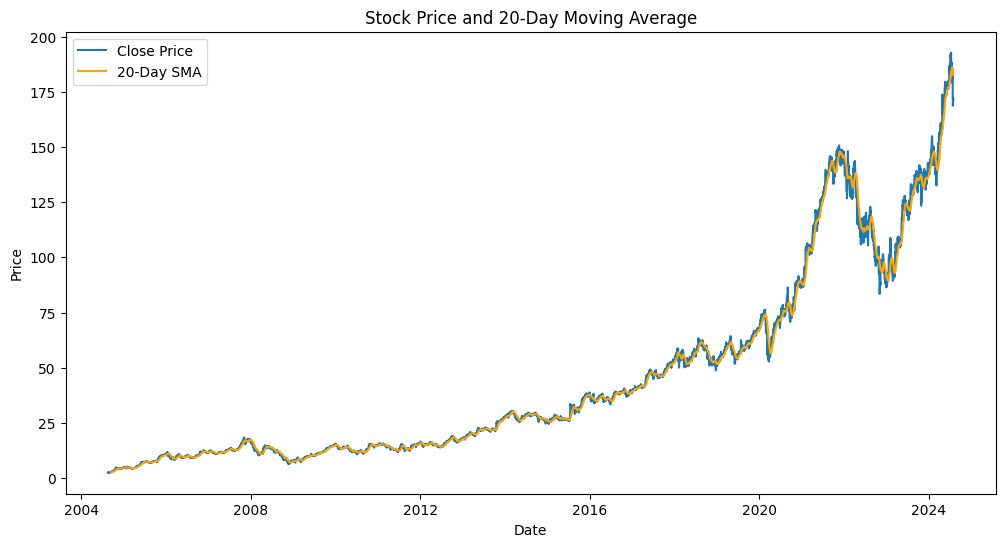

In [13]:
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\GOOG_historical_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is  correct data type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate a 20-day moving average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and 20-Day Moving Average')
plt.legend()
plt.show()